💡 میزان وفاداری پیش‌بینی‌شده: 16.89 از 100


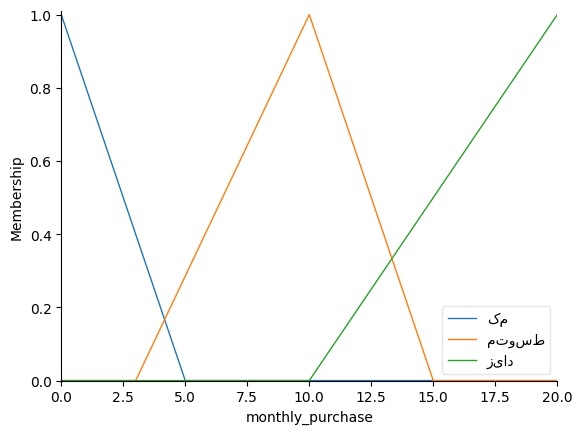

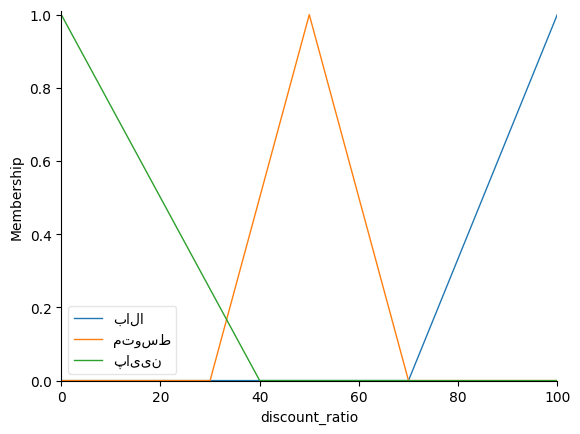

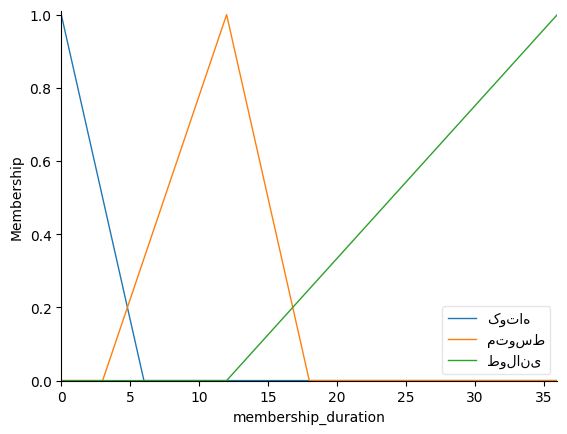

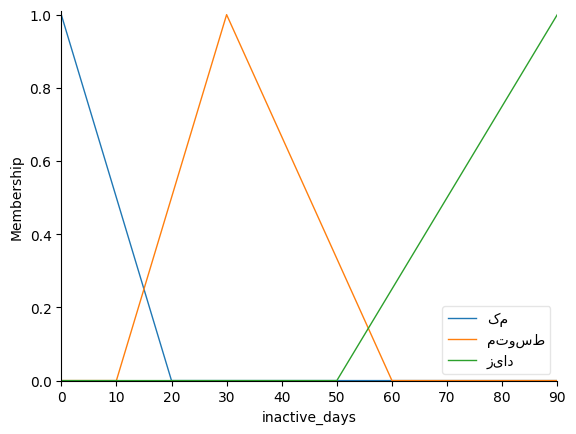

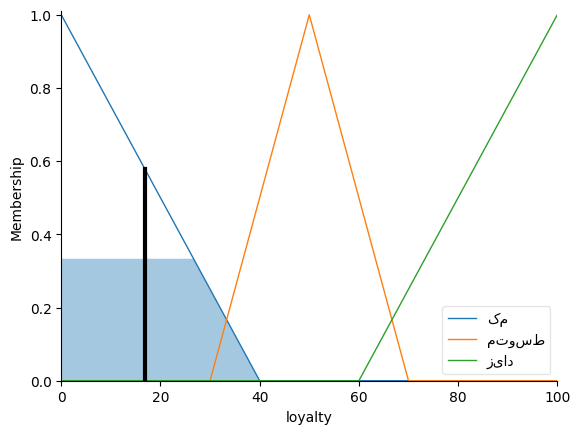

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# -------------------------------
# تعریف متغیرهای ورودی و خروجی
# -------------------------------

monthly_purchase = ctrl.Antecedent(np.arange(0, 21, 1), 'monthly_purchase')  # میلیون تومان
discount_ratio = ctrl.Antecedent(np.arange(0, 101, 1), 'discount_ratio')      # درصد
membership_duration = ctrl.Antecedent(np.arange(0, 37, 1), 'membership_duration')  # ماه
inactive_days = ctrl.Antecedent(np.arange(0, 91, 1), 'inactive_days')  # حداکثر 3 ماه (90 روز)

loyalty = ctrl.Consequent(np.arange(0, 101, 1), 'loyalty')

# -------------------------------
# توابع عضویت
# -------------------------------

monthly_purchase['کم'] = fuzz.trimf(monthly_purchase.universe, [0, 0, 5])
monthly_purchase['متوسط'] = fuzz.trimf(monthly_purchase.universe, [3, 10, 15])
monthly_purchase['زیاد'] = fuzz.trimf(monthly_purchase.universe, [10, 20, 20])

discount_ratio['بالا'] = fuzz.trimf(discount_ratio.universe, [70, 100, 100])
discount_ratio['متوسط'] = fuzz.trimf(discount_ratio.universe, [30, 50, 70])
discount_ratio['پایین'] = fuzz.trimf(discount_ratio.universe, [0, 0, 40])

membership_duration['کوتاه'] = fuzz.trimf(membership_duration.universe, [0, 0, 6])
membership_duration['متوسط'] = fuzz.trimf(membership_duration.universe, [3, 12, 18])
membership_duration['طولانی'] = fuzz.trimf(membership_duration.universe, [12, 36, 36])

inactive_days['کم'] = fuzz.trimf(inactive_days.universe, [0, 0, 20])
inactive_days['متوسط'] = fuzz.trimf(inactive_days.universe, [10, 30, 60])
inactive_days['زیاد'] = fuzz.trimf(inactive_days.universe, [50, 90, 90])

loyalty['کم'] = fuzz.trimf(loyalty.universe, [0, 0, 40])
loyalty['متوسط'] = fuzz.trimf(loyalty.universe, [30, 50, 70])
loyalty['زیاد'] = fuzz.trimf(loyalty.universe, [60, 100, 100])

# -------------------------------
# قوانین فازی
# -------------------------------

rules = [
    ctrl.Rule(monthly_purchase['زیاد'] & discount_ratio['پایین'] & membership_duration['طولانی'] & inactive_days['کم'], loyalty['زیاد']),
    ctrl.Rule(monthly_purchase['متوسط'] & discount_ratio['متوسط'] & membership_duration['متوسط'] & inactive_days['متوسط'], loyalty['متوسط']),
    ctrl.Rule(monthly_purchase['کم'] | discount_ratio['بالا'] | inactive_days['زیاد'], loyalty['کم']),
    ctrl.Rule(membership_duration['طولانی'] & discount_ratio['پایین'], loyalty['زیاد']),
    ctrl.Rule(monthly_purchase['زیاد'] & inactive_days['زیاد'], loyalty['متوسط']),
    ctrl.Rule(monthly_purchase['کم'] & inactive_days['زیاد'], loyalty['کم']),
]

# -------------------------------
# ساخت سیستم کنترل و شبیه‌سازی
# -------------------------------

loyalty_ctrl = ctrl.ControlSystem(rules)
loyalty_sim = ctrl.ControlSystemSimulation(loyalty_ctrl)

# -------------------------------
# مقداردهی ورودی‌ها (نمونه تست)
# -------------------------------

loyalty_sim.input['monthly_purchase'] = 12  # میلیون تومان
loyalty_sim.input['discount_ratio'] = 80    # درصد
loyalty_sim.input['membership_duration'] = 100 # ماه
loyalty_sim.input['inactive_days'] = 10     # روز

# اجرای سیستم
loyalty_sim.compute()

# خروجی
print(f"💡 میزان وفاداری پیش‌بینی‌شده: {loyalty_sim.output['loyalty']:.2f} از 100")

# نمایش گراف خروجی (اختیاری)
# loyalty.view(sim=loyalty_sim)
import matplotlib.pyplot as plt

# نمایش گراف توابع عضویت ورودی‌ها
monthly_purchase.view()
discount_ratio.view()
membership_duration.view()
inactive_days.view()

# نمایش گراف خروجی
loyalty.view(sim=loyalty_sim)

# نمایش همه‌ی گراف‌ها با plt.show()
plt.show()
